<a href="https://colab.research.google.com/github/Koyuki88/CustomCNN/blob/main/Custom_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Clone the repository
!git clone https://github.com/<your_username>/<your_repository_name>.git

In [ ]:
import tensorflow as tf
import numpy as np

def get_data():
    """
    Unified Data Preprocessing Pipeline for Group 4
    Handles Cleaning, Scaling, and Train-Test Split for Fashion-MNIST.
    All models (Shallow CNN, Deep CNN, LeNet, Custom CNN) use 28x28x1 grayscale.
    """
    # 1. TRAIN-TEST SPLIT
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

    # 2. SCALING / NORMALIZATION
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0

    # 3. CLEANING / RESHAPING
    # Explicitly defines the single grayscale channel (28, 28, 1) for all Keras Conv2D layers
    x_train = np.expand_dims(x_train, axis=-1)
    x_test = np.expand_dims(x_test, axis=-1)

    return (x_train, y_train), (x_test, y_test)

# Every team member simply calls this one line before building their model:
(train_images, train_labels), (test_images, test_labels) = get_data()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 31s 19ms/step - accuracy: 0.7985 - loss: 0.6183 - val_accuracy: 0.8962 - val_loss: 0.2864
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.8878 - loss: 0.3116 - val_accuracy: 0.9030 - val_loss: 0.2654
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9047 - loss: 0.2593 - val_accuracy: 0.9136 - val_loss: 0.2382
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9140 - loss: 0.2373 - val_accuracy: 0.9112 - val_loss: 0.2513
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9217 - loss: 0.2137 - val_accuracy: 0.9215 - val_loss: 0.2156
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9263 - loss: 0.1976 - val_accuracy: 0.9248 - val_loss: 0.2085
Epoch 7/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9316 - loss: 0.1883 - val_accuracy: 0.9317 - val_loss: 0.1916
Epoch 8/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9372 - loss: 0.1751 - val_accuracy:

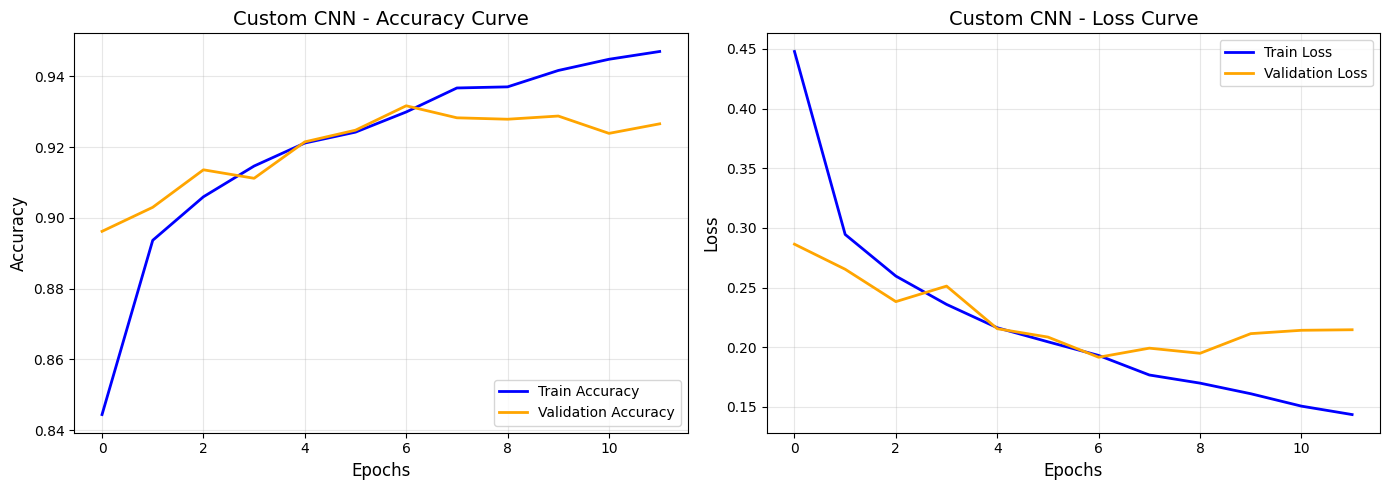


Generating predictions on the 10,000 test images...
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

CLASSIFICATION REPORT (Custom CNN)
              precision    recall  f1-score   support

 T-shirt/top       0.89      0.89      0.89      1000
     Trouser       0.99      0.99      0.99      1000
    Pullover       0.85      0.93      0.89      1000
       Dress       0.93      0.94      0.94      1000
        Coat       0.88      0.91      0.89      1000
      Sandal       0.99      0.99      0.99      1000
       Shirt       0.85      0.73      0.78      1000
     Sneaker       0.97      0.97      0.97      1000
         Bag       0.99      0.99      0.99      1000
  Ankle boot       0.98      0.97      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



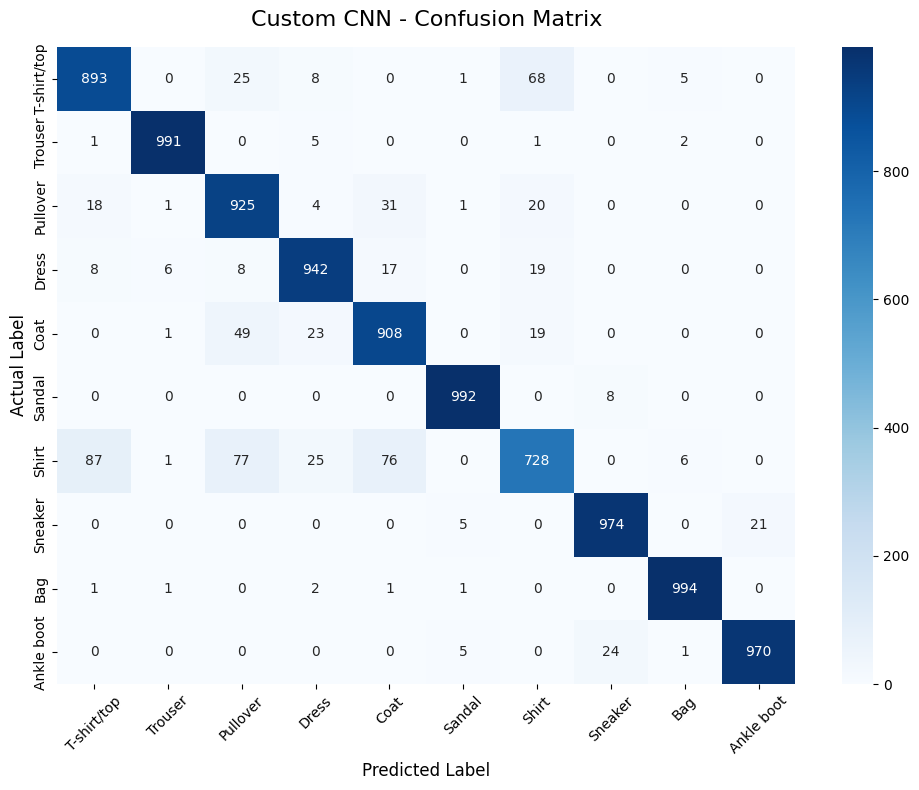

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# 1. Native Data Load (No weird RGB conversions!)
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

# 2. Build the Custom CNN
model = models.Sequential([
    # Block 1
    layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25), # <--- Anti-overfitting

    # Block 2
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25), # <--- Anti-overfitting

    # Classification Head
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),  # <--- Heavy anti-overfitting before final decision
    layers.Dense(10, activation='softmax')
])

# 3. Compile and Train with Early Stopping
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stopper = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(train_images, train_labels,
                    epochs=50,
                    batch_size=64,
                    validation_data=(test_images, test_labels),
                    callbacks=[early_stopper])


# 1. PLOT LOSS AND ACCURACY CURVES
# These plots will perfectly demonstrate how Early Stopping prevented overfitting!
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy Curve
ax1.plot(history.history['accuracy'], label='Train Accuracy', color='blue', lw=2)
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange', lw=2)
ax1.set_title('Custom CNN - Accuracy Curve', fontsize=14)
ax1.set_xlabel('Epochs', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.legend(loc='lower right')
ax1.grid(alpha=0.3)

# Loss Curve
ax2.plot(history.history['loss'], label='Train Loss', color='blue', lw=2)
ax2.plot(history.history['val_loss'], label='Validation Loss', color='orange', lw=2)
ax2.set_title('Custom CNN - Loss Curve', fontsize=14)
ax2.set_xlabel('Epochs', fontsize=12)
ax2.set_ylabel('Loss', fontsize=12)
ax2.legend(loc='upper right')
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# 2. GENERATE PREDICTIONS
print("\nGenerating predictions on the 10,000 test images...")
y_pred_probs = model.predict(test_images)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Fashion-MNIST official class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 3. PRINT REQUIRED METRICS (Precision, Recall, F1-Score)
print("\n" + "="*55)
print("CLASSIFICATION REPORT (Custom CNN)")
print("="*55)
# This single function calculates Accuracy, Precision, Recall, and F1-Score for every class!
print(classification_report(test_labels, y_pred_classes, target_names=class_names))

# 4. PLOT CONFUSION MATRIX

cm = confusion_matrix(test_labels, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Custom CNN - Confusion Matrix', fontsize=16, pad=15)
plt.ylabel('Actual Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()